## <font size='5' color='red'>Contents</font>

* [introduction](#1)

* [Loading required packages](#2)

* [Getting basic Ideas](#3) 

    * [Basic Cleaning]()
    
* [Exploratory Data analysis](#4)

    * [Class distribution]()
    * [Distribution of length of tweets]()
    * [Distribution of number of words in tweets]()
    * [Distribution of target]()
    * [Common Stopwords]()
    * [Common words in tweets w/o stopwords]()
    * [Common bigrams in tweeets]()
    * [WordClouds of tweets]()
    * [Readability index](#5)

*

<font size='3' color='red'>If you find this kernel useful,consider doing an upvote..this will motivate me create more content</font>

## <font size='5' color='green'>Introduction</font><a id='1'></a>

With all of the tweets circulating every second it is hard to tell whether the sentiment behind a specific tweet will impact a company, or a person's, brand for being viral (positive), or devastate profit because it strikes a negative tone. Capturing sentiment in language is important in these times where decisions and reactions are created and updated in seconds. But, which words actually lead to the sentiment description? In this competition you will need to pick out the part of the tweet (word or phrase) that reflects the sentiment.

Help build your skills in this important area with this broad dataset of tweets. Work on your technique to grab a top spot in this competition. What words in tweets support a positive, negative, or neutral sentiment?

毎秒あらゆるツイートが流れている中で、特定のツイートの背景にある感情が企業や個人のブランドに影響を与えるのか、それともネガティブなトーンのツイートで利益を壊滅的なものにするのかを見極めるのは難しい。意思決定や反応が数秒で作成され、更新されるこの時代には、言葉でセンチメントを捉えることが重要です。しかし、実際にどの言葉がセンチメントの説明につながるのでしょうか？このコンテストでは、ツイートの中で感情を反映している部分（単語やフレーズ）をピックアップする必要があります。

このツイートの幅広いデータセットを使って、この重要な分野でのスキルを身につけましょう。このコンテストでトップの座を掴むために、あなたのテクニックを磨いてください。ツイートの中でポジティブ、ネガティブ、ニュートラルな感情を支える言葉は何ですか？

## <font size='4' color='green'>Loading Required packages</font><a id='2'></a>


In [1]:
!pip install textstat

     |████████████████████████████████| 3.0 MB 5.6 MB/s eta 0:00:01


In [3]:
!pip install seaborn

     |████████████████████████████████| 215 kB 3.6 MB/s eta 0:00:01


In [5]:
!pip install nltk

     |████████████████████████████████| 1.5 MB 3.6 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449903 sha256=5b0116da73370650356b6f20069acc0918a908ede4a615eabbdf2eefadffcc9b
  Stored in directory: /home/tidal/.cache/pip/wheels/e3/c9/b0/ed26a73ef75a53145820825afa8e2d2c9b30fe9f6c10cd3202
Successfully built nltk


In [7]:
!pip install wordcloud

     |████████████████████████████████| 361 kB 3.6 MB/s eta 0:00:01


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict,Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
nltk.download('stopwords')
stop=set(stopwords.words('english'))
plt.style.use('seaborn')

from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import textstat
from tqdm import tqdm
from statistics import *
import plotly.express as px
from plotly.subplots import make_subplots

import plotly.graph_objects as go

[nltk_data] Downloading package stopwords to /home/tidal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## <font size='4' color='green'>Getting Basic Ideas</font><a id='3'></a>

In [2]:
train = pd.read_csv('/home/tidal/ML_Data/Tweet_Sentiment_Extraction/train.csv')
test = pd.read_csv('/home/tidal/ML_Data/Tweet_Sentiment_Extraction/test.csv')
target=train['sentiment']

In [14]:
print('There are {} rows and {} cols in train set'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} cols in test set'.format(test.shape[0],test.shape[1]))

There are 27486 rows and 4 cols in train set
There are 3535 rows and 3 cols in test set


In [15]:
train.head(3)

textID                                               text  \
0  a3d0a7d5ad  Spent the entire morning in a meeting w/ a ven...   
1  251b6a6766      Oh! Good idea about putting them on ice cream   
2  c9e8d1ef1c  says good (or should i say bad?) afternoon!  h...   

                                 selected_text sentiment  
0  my boss was not happy w/ them. Lots of fun.   neutral  
1                                         Good  positive  
2  says good (or should i say bad?) afternoon!   neutral

In [17]:
#アドレス、アルファベット以外の浮いた文字は削除
import re
def basic_cleaning(text):
    text=re.sub(r'https?://www\.\S+\.com','',text)
    text=re.sub(r'[^A-Za-z|\s]','',text)
    return text

def clean(df):
    for col in ['text','selected_text']:
        df[col]=df[col].astype(str).apply(lambda x:basic_cleaning(x))
    return df

colors=['blue','green','red']
sent=train.sentiment.unique()

In [18]:
sent

array(['neutral', 'positive', 'negative'], dtype=object)

## <font size='4' color='green'>Exploratory Data Analysis</font><a id='4'></a>

- Let's first take a look at the class distribution of sentiment label
まずはセンチメントラベルのクラス分布を見てみましょう。

In [19]:
fig=make_subplots(1,2,subplot_titles=('Train set','Test set'))
x=train.sentiment.value_counts()
fig.add_trace(go.Bar(x=x.index,y=x.values,marker_color=['blue','green','red'],name='train'),row=1,col=1)
x=test.sentiment.value_counts()
fig.add_trace(go.Bar(x=x.index,y=x.values,marker_color=['blue','green','red'],name='test'),row=1,col=2)

- There is a class imbalance between labels,neutral class dominates over the other class tweets.
- The distributions of labels follows the same trend in train and test.
- ラベルの間にクラスの不均衡があり、中立的なクラスが他のクラスのツイートを支配している。
- ラベルの分布は訓練とテストで同じ傾向を示しています。

**But our task is not to predict these labels,but to predict the selected text which can help us figure out the sentiment**
しかし、我々の仕事はこれらのラベルを予測することではなく、感情を把握するのに役立つ選択されたテキストを予測することです。

In [20]:
df=pd.concat([train,test])
df['text']=df['text'].astype(str)
df['seleceted_text']=df['selected_text'].astype(str)

### <font size='3' color='blue'>ツイートの長さの分布</font>

In [22]:
vals=[]
for i in range(0,3):
    x=df[df['sentiment']==sent[i]]['text'].str.len()
    vals.append(x)

fig = ff.create_distplot(vals, sent,show_hist=False)
fig.update_layout(title="ツイートの長さの分布")
fig.show()

- The number of character in tweets ranges from 1 to 160 (max).
- More tweets contains less than 60 characters.
- ツイートの文字数は1～160文字（最大）です。
- それ以上のツイートは60文字未満です。

### <font size='3' color='blue'>ツイートの長さの分布(selected_text)</font>

In [24]:
vals=[]
for i in range(0,3):
    x=df[df['sentiment']==sent[i]]['selected_text'].dropna().str.len()
    vals.append(x)

fig = ff.create_distplot(vals, sent)
fig.update_layout(title="ツイートの長さの分布(selected_text)")
fig.show()

- The selected text is of much larger length in neutral sentiment tweets.Why is this ? We wil find out later..
- The distribution of selected texts in positive and negative are almost the same.
- selected textは、中立的な感情のつぶやきの中ではるかに大きな長さのものです。これはなぜなのでしょうか？
- ポジティブとネガティブでの選択テキストの分布はほぼ同じです。

### <font size='3' color='blue'>ワード数の分布</font>

Text(0.5, 0.98, 'Distribution of number of No: Words in Tweets')

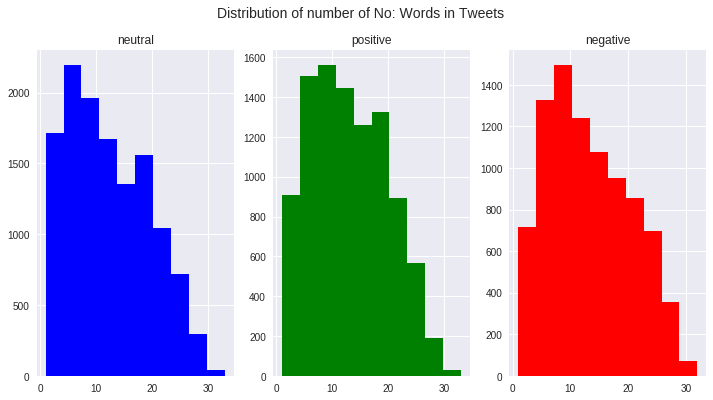

In [11]:

sent=df.sentiment.unique()
fig,ax= plt.subplots(1,3,figsize=(12,6))
for i in range(0,3):
    df[df['sentiment']==sent[i]]['text'].str.split().str.len().hist(ax=ax[i],color=colors[i])
    ax[i].set_title(sent[i])
fig.suptitle("Distribution of number of No: Words in Tweets", fontsize=14)

- The number of words in tweets ranges from 1 to 30,5-10 being the most common choice.
- ツイートの単語数は1から30まであり、5から10が最も多い。

### <font size='3' color='blue'>What is distribution of number of words in selected text?</font>

Text(0.5, 0.98, 'Distribution of number of No: Words in Selected text')

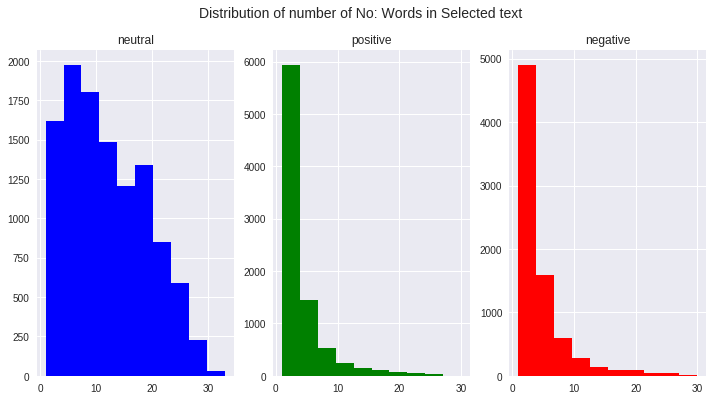

In [12]:

sent=train.sentiment.unique()
fig,ax= plt.subplots(1,3,figsize=(12,6))
for i in range(0,3):
    train[train['sentiment']==sent[i]]['selected_text'].str.split().str.len().hist(ax=ax[i],color=colors[i])
    ax[i].set_title(sent[i])
fig.suptitle("Distribution of number of No: Words in Selected text", fontsize=14)

Yes,this  follows the same trend as of number of characters.<br>
はい、これはツイートの長さと同じ傾向です。

In [26]:
## Number of words in the selected_text ##
train["num_words"] = train["selected_text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the selected_text(被った単語は1としてカウント) ##
train["num_unique_words"] = train["selected_text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the selected_text ##
train["num_chars"] = train["selected_text"].apply(lambda x: len(str(x)))

## Number of stopwords in the selected_text ##
train["num_stopwords"] = train["selected_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the selected_text ##  (punctuation:句読点)
train["num_punctuations"] =train['selected_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the selected_text ##（一文字でも大文字があればTrue判定）
train["num_words_upper"] = train["selected_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the selected_text ##（最初が大文字、あとは小文字（英語としてはこれがタイトルの規則らしい。））
train["num_words_title"] = train["selected_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the selected_text ##
train["mean_word_len"] = train["selected_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [27]:
## Truncate some extreme values for better visuals ##　一部の極端な値を切り捨てて、より良いビジュアルを実現 
train['num_words'].loc[train['num_words']>60] = 60 #truncation for better visuals　見やすくするための切り捨て
train['num_punctuations'].loc[train['num_punctuations']>10] = 10 #truncation for better visuals　見やすくするための切り捨て
train['num_chars'].loc[train['num_chars']>350] = 350 #truncation for better visuals　見やすくするための切り捨て

fig = px.box(train, x="sentiment", y="num_words", points="all",color='sentiment')
fig.show()

### <font size='3' color='blue'>最も一般的なストップワードはどれですか？</font>

In [15]:
def preprocess_news(df,stop=stop,n=1,col='text'):
    '''Function to preprocess and create corpus'''
    new_corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for text in df[col]:
        words=[w for w in word_tokenize(text) if (w not in stop)]
       
        words=[lem.lemmatize(w) for w in words if(len(w)>n)]
     
        new_corpus.append(words)
        
    new_corpus=[word for l in new_corpus for word in l]
    return new_corpus


Text(0.5, 0.98, 'Common stopwords in different sentiments')

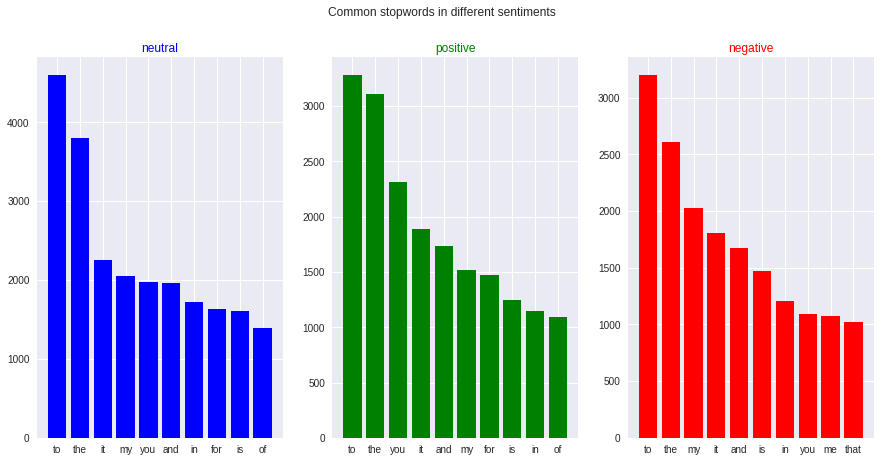

In [16]:

fig,ax=plt.subplots(1,3,figsize=(15,7))
for i in range(3):
    new=df[df['sentiment']==sent[i]]
    corpus_train=preprocess_news(new,{})
    
    dic=defaultdict(int)
    for word in corpus_train:
        if word  in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    ax[i].bar(x,y,color=colors[i])
    ax[i].set_title(sent[i],color=colors[i])

fig.suptitle("Common stopwords in different sentiments")

1. `the` dominated in the list of common stopwords,followed by `and` and '`you`

### <font size='3' color='blue'>Distribution of no: punctuations in tweets</font>

Text(0.5, 0.98, 'Number of Punctuations in tweets')

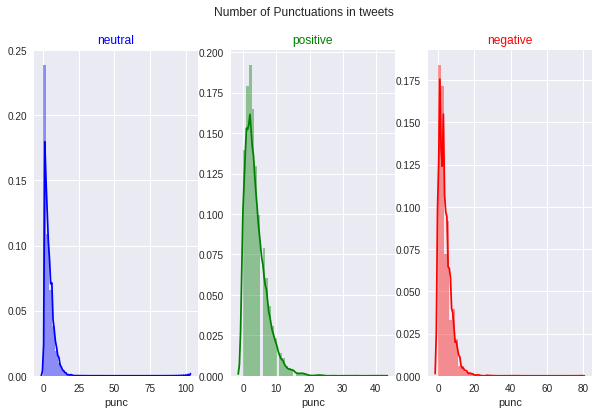

In [17]:
df['punc']=df['text'].apply(lambda x : [c for c in x if c in string.punctuation])
fig,ax=plt.subplots(1,3,figsize=(10,6))
for i in range(3):
    new=df[df['sentiment']==sent[i]]['punc'].map(lambda x: len(x))
    sns.distplot(new,color=colors[i],ax=ax[i])
    ax[i].set_title(sent[i],color=colors[i])
    
fig.suptitle("Number of Punctuations in tweets") 

- All the distributions are left skewed.
- There happens to be more punctuations in positive tweets.

In [18]:
fig = px.box(train, x="sentiment", y="num_punctuations", points="all",color='sentiment')
fig.show()

### <font size='3' color='blue'>Number of unique words in tweets</font>

Text(0.5, 0.98, 'Distribution of number of unique words')

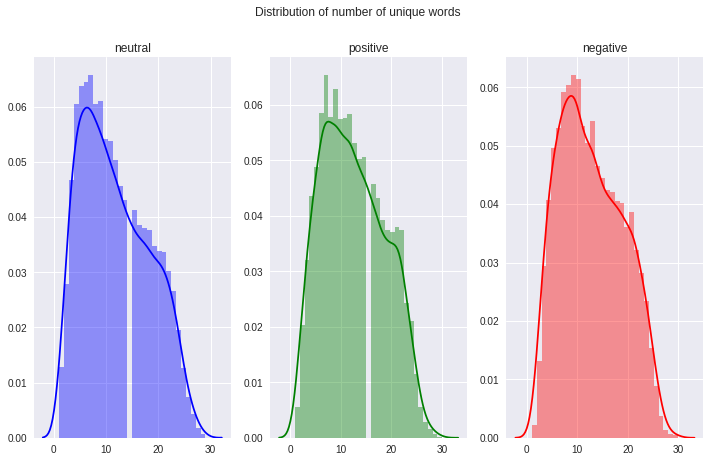

In [19]:
fig,ax=plt.subplots(1,3,figsize=(12,7))
for i in range(3):
    new=df[df['sentiment']==sent[i]]['text'].map(lambda x: len(set(x.split())))
    sns.distplot(new.values,ax=ax[i],color=colors[i])
    ax[i].set_title(sent[i])
fig.suptitle("Distribution of number of unique words")

hmm..the distribution seems to be quite similar,let us check for selected text

Text(0.5, 0.98, 'Distribution of number of unique words')

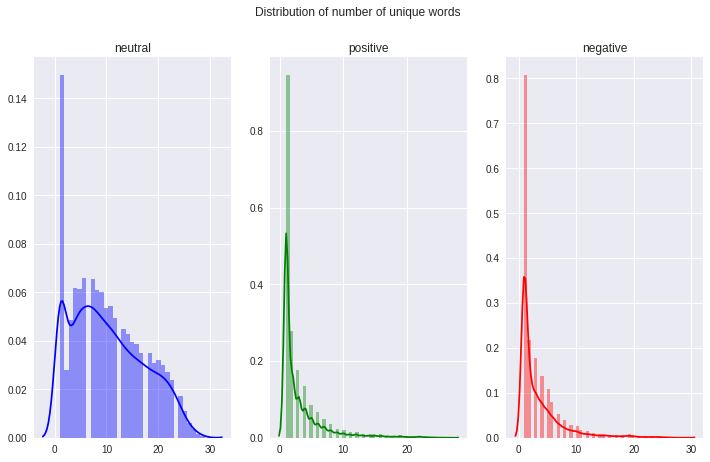

In [20]:
fig,ax=plt.subplots(1,3,figsize=(12,7))
for i in range(3):
    new=df[df['sentiment']==sent[i]]['selected_text'].astype(str).map(lambda x: len(set(x.split())))
    sns.distplot(new.values,ax=ax[i],color=colors[i])
    ax[i].set_title(sent[i])
fig.suptitle("Distribution of number of unique words")

In [21]:
fig = px.box(train, x="sentiment", y="num_unique_words", points="all",color='sentiment')
fig.show()

- For negative and positive tweets this distributions is similar,this should be because of selected keywords from tweets.
- In case of neutral tweets it is spread and there aren't a specefic keyword to select.
- This may cause neutral class to be difficult to predict.

### <font size='3' color='blue'>Common punctuations in tweets</font>

Text(0.5, 0.98, 'Punctuations in tweets')

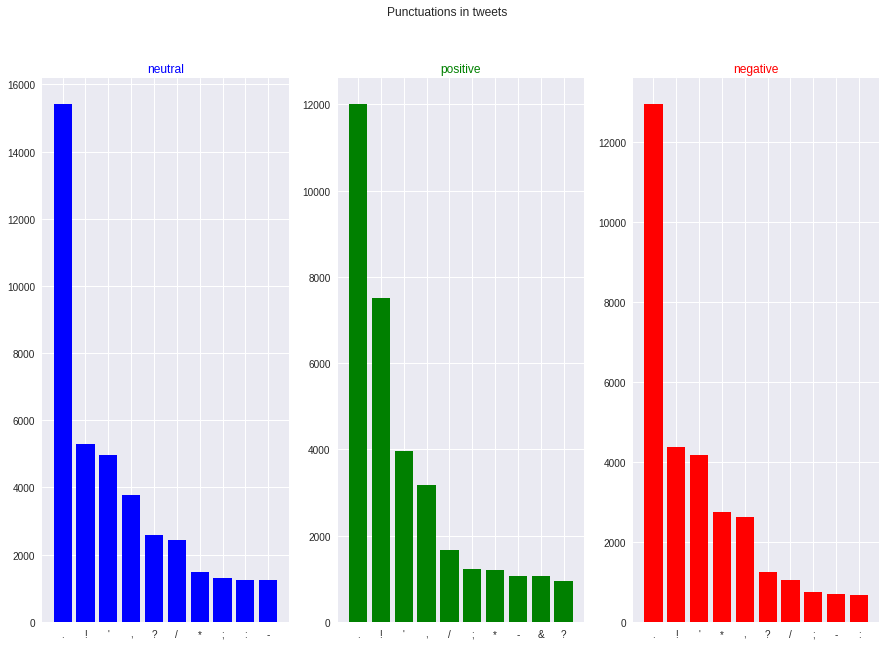

In [22]:
fig,ax=plt.subplots(1,3,figsize=(15,10))
for i in range(3):
    new=df[df['sentiment']==sent[i]]['punc']
    punc=[p for pun in new.values for p in pun]
    counter=Counter(punc).most_common(10)
    x,y=zip(*counter)
    ax[i].bar(x,y,color=colors[i])
    ax[i].set_title(sent[i],color=colors[i])
    
fig.suptitle("Punctuations in tweets")   
    
    

## <font size='4' color='blue'>Which are the most common words?</font> 

In [23]:
df=clean(df)

Text(0.5, 0.98, 'Common words in tweet text')

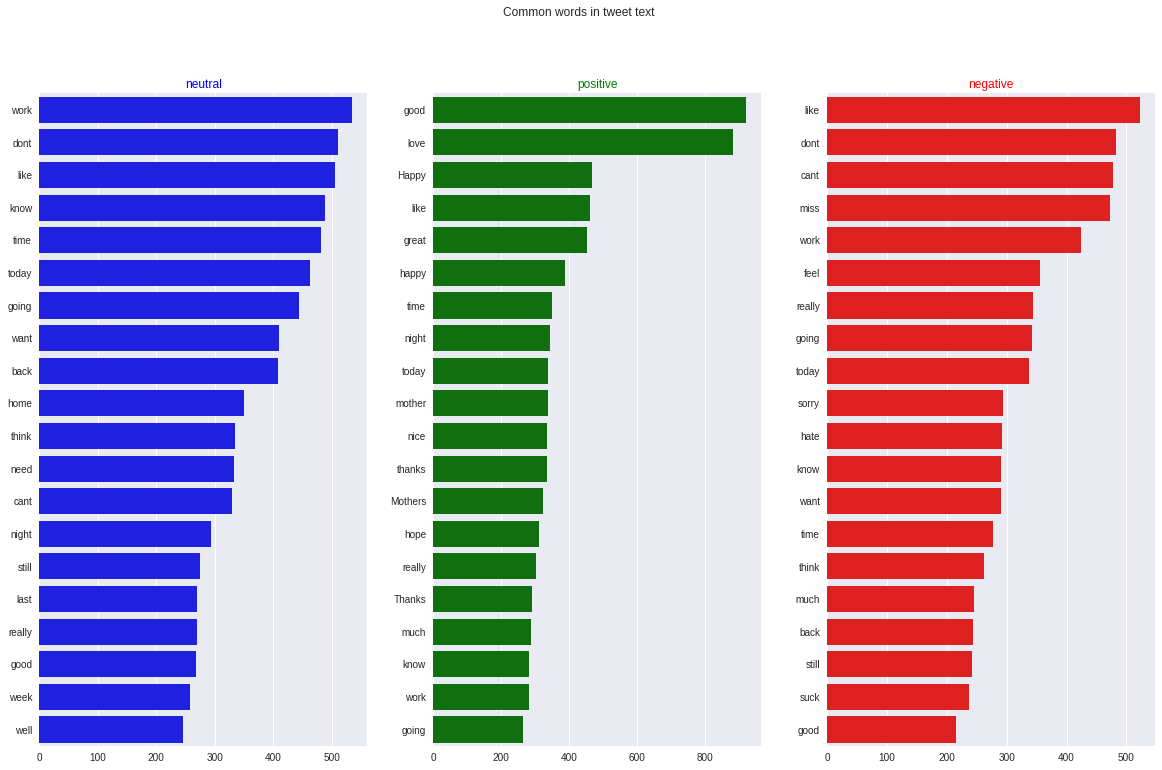

In [24]:

fig,ax=plt.subplots(1,3,figsize=(20,12))
for i in range(3):
    new=df[df['sentiment']==sent[i]]
    corpus_train=preprocess_news(new,n=3)
    counter=Counter(corpus_train)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:20]:
        if (word not in stop) :
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x,ax=ax[i],color=colors[i])
    ax[i].set_title(sent[i],color=colors[i])
fig.suptitle("Common words in tweet text")

- It is evident that there are more positive words like `good`,`thanks` etc on positive tweets.
- It can be observed that there are a lot of negative words in negative tweets.

## <font color='blue' size='4'>Which are the most common words in selected text?</font>

Text(0.5, 0.98, 'Common words in selected text')

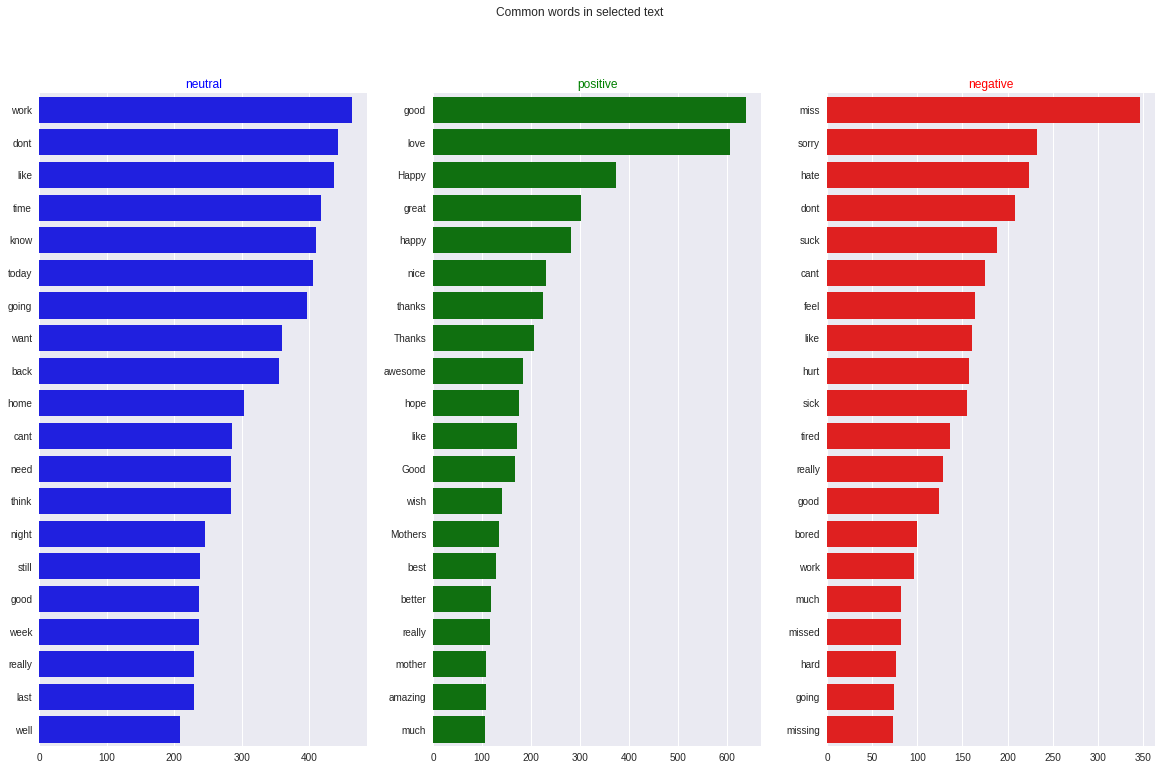

In [25]:
fig,ax=plt.subplots(1,3,figsize=(20,12))
for i in range(3):
    new=df[df['sentiment']==sent[i]]   
    corpus=preprocess_news(new,n=3,col='selected_text')
    counter=Counter(corpus)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:20]:
        if (word not in stop) :
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x,ax=ax[i],color=colors[i])
    ax[i].set_title(sent[i],color=colors[i])
fig.suptitle("Common words in selected text")

- The above trend repreats here ,here it is more evident and clear.
- Let's dig bit further for positive ane negetive words...


### <font size='3' color='blue'>Check for bigrams in selected text</font>

In [26]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n),stop_words=stop).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

Text(0.5, 0.98, 'Common bigrams in selected text')

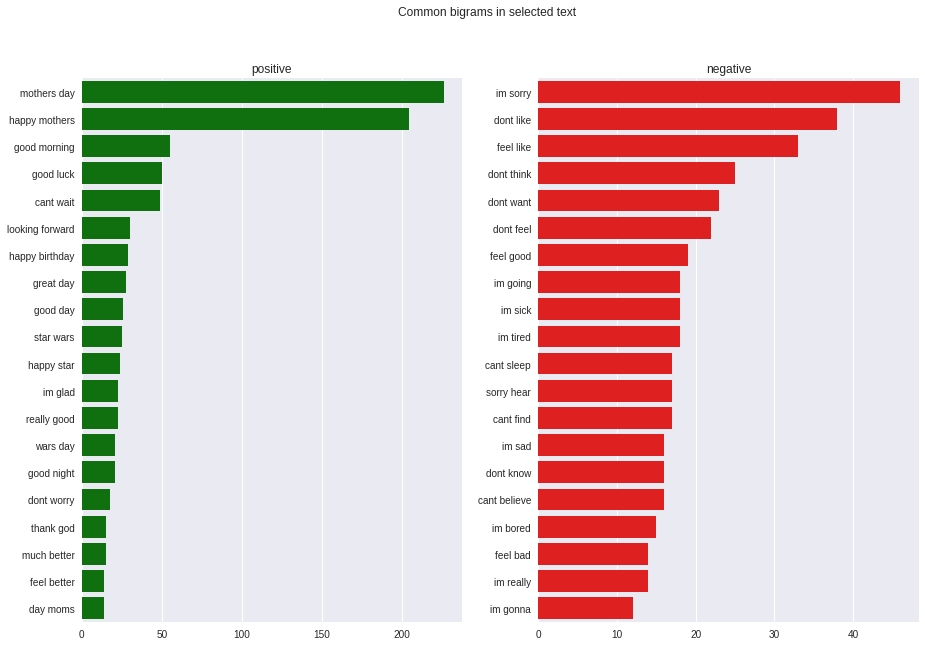

In [27]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
for i in range(2):
    new=df[df['sentiment']==sent[i+1]]['selected_text']
    top_n_bigrams=get_top_ngram(new,2)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x,ax=ax[i],color=colors[i+1])
    ax[i].set_title(sent[i+1])
    
fig.suptitle("Common bigrams in selected text")

- Well,you can see the difference.
- `'positve` tweets are filled with positive words like `great day`,'`happy day` etc.
- `negative` tweets have bigrams like `im sorry`, and many words starting with `dont`.

### <font size='3' color='blue'>WordCloud for tweets</font>

In [28]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None,ax=None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1 
        )
    
    wordcloud=wordcloud.generate(str(data))
    ax.imshow(wordcloud,interpolation='nearest')
    ax.axis('off')
    #plt.show()

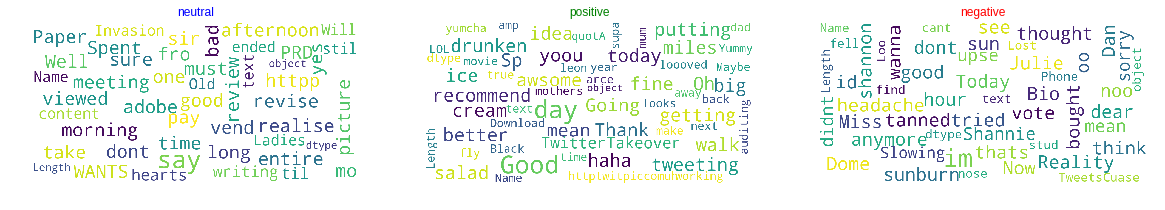

In [29]:
fig,ax=plt.subplots(1,3,figsize=(20,12))
for i in range(3):
    new=df[df['sentiment']==sent[i]]['text']
    show_wordcloud(new,ax=ax[i])
    ax[i].set_title(sent[i],color=colors[i])

### <font size='3' color='blue'>Wordcloud for selected text</font>

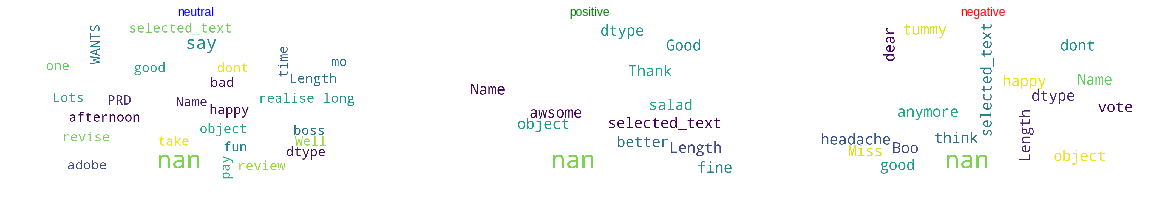

In [30]:
fig,ax=plt.subplots(1,3,figsize=(20,12))
for i in range(3):
    new=df[df['sentiment']==sent[i]]['selected_text'].dropna()
    show_wordcloud(new,ax=ax[i])
    ax[i].set_title(sent[i],color=colors[i])
    

<font size='3' color='blue'>Let's plot a boxplot and see the distributions</font>

In [31]:
## Number of words in the text ##
train["num_words"] = train["text"].apply(lambda x: len(str(x).split()))
test["num_words"] = test["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
train["num_unique_words"] = train["text"].apply(lambda x: len(set(str(x).split())))
test["num_unique_words"] = test["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
train["num_chars"] = train["text"].apply(lambda x: len(str(x)))
test["num_chars"] = test["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
train["num_stopwords"] = train["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
test["num_stopwords"] = test["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
train["num_punctuations"] =train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
test["num_punctuations"] =test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
train["num_words_upper"] = train["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
test["num_words_upper"] = test["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
train["num_words_title"] = train["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
test["num_words_title"] = test["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
train["mean_word_len"] = train["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test["mean_word_len"] = test["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

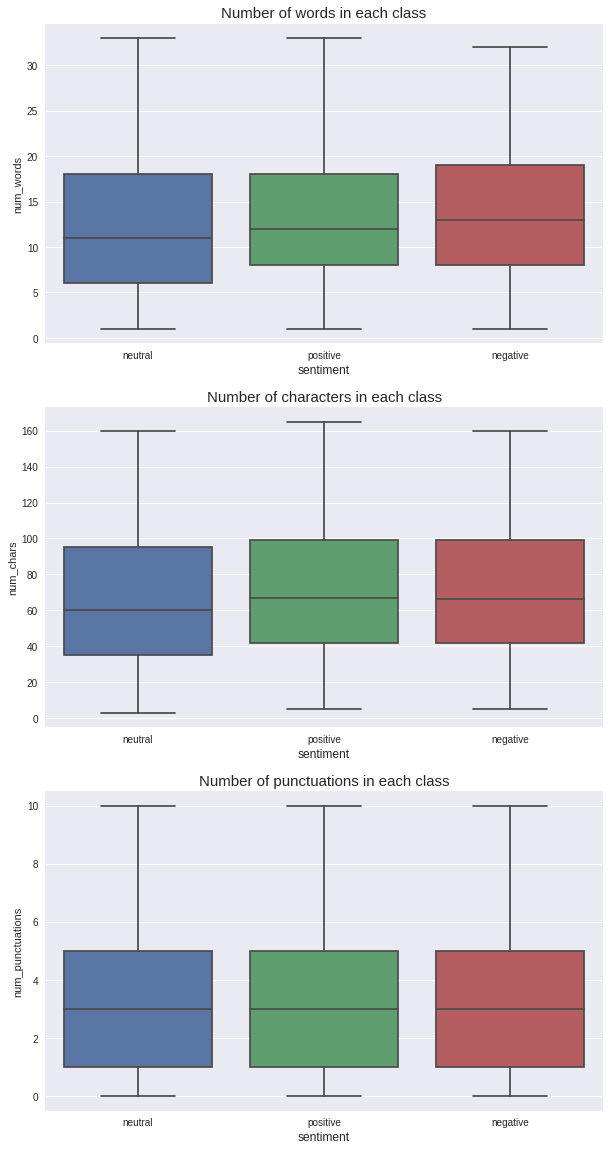

In [32]:
## Truncate some extreme values for better visuals ##
train['num_words'].loc[train['num_words']>60] = 60 #truncation for better visuals
train['num_punctuations'].loc[train['num_punctuations']>10] = 10 #truncation for better visuals
train['num_chars'].loc[train['num_chars']>350] = 350 #truncation for better visuals

f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.boxplot(x='sentiment', y='num_words', data=train, ax=axes[0])
axes[0].set_xlabel('sentiment', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.boxplot(x='sentiment', y='num_chars', data=train, ax=axes[1])
axes[1].set_xlabel('sentiment', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.boxplot(x='sentiment', y='num_punctuations', data=train, ax=axes[2])
axes[2].set_xlabel('sentiment', fontsize=12)
#plt.ylabel('Number of punctuations in text', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)
plt.show()

Let's do the same for selected_text and see the distribution

## <font color='green' size='4'>Readability features</font><a id='5'></a>

Readability is the ease with which a reader can understand a written text. In natural language processing, the readability of text depends on its content. It focuses on the words we choose, and how we put them into sentences and paragraphs for the readers to comprehend.
9.1 The Flesch Reading Ease formula

   - In the Flesch reading-ease test, higher scores indicate material that is easier to read; lower numbers mark passages that are more difficult to read. The formula for the Flesch reading-ease score (FRES) test is 
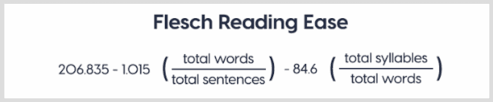   
   
   
   
  -  90-100 - Very Easy
  -  80-89 - Easy
  -  70-79 - Fairly Easy
  -  60-69 - Standard
  -  50-59 - Fairly Difficult
  -  30-49 - Difficult
  -  0-29 - Very Confusing


In [33]:
#utility functions:
def plot_readability(a,b,c,title,bins=0.4,colors=colors):
    trace1 = ff.create_distplot([a,b,c],sent, bin_size=bins, colors=colors, show_rug=False)
    trace1['layout'].update(title=title)
    py.iplot(trace1, filename='Distplot')
    table_data= [["Statistical Measures","neu",'pos','neg'],
                ["Mean",mean(a),mean(b),mean(c)],
                ["Standard Deviation",pstdev(a),pstdev(b),pstdev(c)],
                ["Variance",pvariance(a),pvariance(b),pvariance(c)],
                ["Median",median(a),median(b),median(c)],
                ["Maximum value",max(a),max(b),max(c)],
                ["Minimum value",min(a),min(b),min(c)]]
    trace2 = ff.create_table(table_data)
    py.iplot(trace2, filename='Table')


In [34]:
tqdm.pandas()
fre_neu = np.array(df["text"][df["sentiment"] == sent[0]].progress_apply(textstat.flesch_reading_ease))
fre_pos = np.array(df["text"][df["sentiment"] == sent[1]].progress_apply(textstat.flesch_reading_ease))
fre_neg = np.array(df["text"][df["sentiment"] == sent[2]].progress_apply(textstat.flesch_reading_ease))

plot_readability(fre_neu,fre_pos,fre_neg,"Flesch Reading Ease",20)

100%|██████████| 8787/8787 [00:01<00:00, 6355.44it/s]


- Mean score of tweets is ~70,so it is considered as fairly easy to read.

## <font size='4' color='blue'> Fast BERT-lstm model</font><a id='5'></a>

In this section I am trying to build a multi-input model using BERT embedding for predicting the target keyphrases.
I will explain my approach step by step,this is a naive approach and will be improved later.

ここでは、BERT埋め込みを用いて、ターゲットキーフレーズを予測するための多入力モデルの構築を試みている。これはナイーブなアプローチであり、後ほど改良を加えていく予定です。

In [3]:

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
#from kaggle_datasets import KaggleDatasets
import transformers
from tqdm.notebook import tqdm
from tokenizers import BertWordPieceTokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D,Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import concatenate
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
import gc
import os

In [4]:
cols=['textID','text','sentiment','selected_text']
train_df=train[cols].copy()
del train
test_df=test.copy()
del test
gc.collect()

22

In [6]:
train

NameError: name 'train' is not defined

- Below function is from this [kernel](https://www.kaggle.com/xhlulu/jigsaw-tpu-distilbert-with-huggingface-and-keras) by @xhlulu,this is used to encode the sentences easily and quickly using distilbert tokenizer.
- 以下の関数は @xhlulu さんのカーネルのもので、 distilbert tokenizer を使って簡単かつ高速に文章をエンコードしています。

In [5]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=128):
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(max_length=maxlen)
    all_ids = []
    
    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

- We load the Distilbert pretained tokenizer (uncased) and save it to directory.
- Reload and use BertWordPieceTokenizer.
- An implementation of a tokenizer consists of the following pipeline of processes, each applying different transformations to the textual information:
- Distilbert pretained tokenizerをロードし、ディレクトリに保存します。
- リロードして、BertWordPieceTokenizerを使用します。
- トークン化器の実装は、それぞれがテキスト情報に異なる変換を適用する以下のプロセスのパイプラインで構成されています。
![](https://miro.medium.com/max/1400/1*7uy9X3eE1rVmqV08yKrDgg.png)

In [6]:
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased')  ## change it to commit

# Save the loaded tokenizer locally
save_path = '/home/tidal/ML_Data/Tweet_Sentiment_Extraction/distilbert_base_uncased/'
if not os.path.exists(save_path):
    os.makedirs(save_path)
tokenizer.save_pretrained(save_path)

# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('/home/tidal/ML_Data/Tweet_Sentiment_Extraction/distilbert_base_uncased/vocab.txt', lowercase=True)
fast_tokenizer

Tokenizer(vocabulary_size=30522, model=BertWordPiece, add_special_tokens=True, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], clean_text=True, handle_chinese_chars=True, strip_accents=True, lowercase=True, wordpieces_prefix=##)

- Now the comment text is prepared and encoded using this tokenizer easily.
- We here set the maxlen=128,(limit)
- これで、このトークナイザーを使って簡単にコメントテキストを作成し、エンコードすることができるようになりました。
- ここでは、maxlen=128, (limit)を設定しています。

In [7]:
x_train = fast_encode(train_df.text.astype(str), fast_tokenizer, maxlen=128)
x_test = fast_encode(test_df.text.astype(str),fast_tokenizer,maxlen=128)

- Now we load the pretrained bert ('uncased') transformer layer.
- This is used for creating the representations and training our corpus.
- ここで、事前学習されたbert ('uncased') トランスフォーマー層をロードします。
- これは表現の作成とコーパスの学習に使われます。

In [8]:
transformer_layer = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')

This code is lifted from [kernel](https://www.kaggle.com/gskdhiman/bert-baseline-starter-kernel#Training).
- In this section we create the representaion for the selected text from tweet text.
- The representation is created such that the positions of tokens which is selcted from text is represented with 1 and others with 0.
- for example,consider the tweet `" I have a cute dog"` and selected text `"cute dog"`
- This produces the ouput as ` [0,0,0,1,1]`
- ここでは、ツイートのテキストから選択されたテキストの表現を作成します。
- 表現は、テキストから選択されたトークンの位置が1、それ以外の位置が0となるように作成されます。
- 例えば、`"I have a cute dog"`というツイートと、`"cute dog"`という選択テキストを考えてみましょう。
- これにより、出力は ` [0,0,0,1,1]` となります

__t_textが一部おかしい(”##”が入っている)__

In [9]:
def create_targets(df):
    df['t_text'] = df['text'].apply(lambda x: tokenizer.tokenize(str(x)))
    df['t_selected_text'] = df['selected_text'].apply(lambda x: tokenizer.tokenize(str(x)))
    def func(row):
        x,y = row['t_text'],row['t_selected_text'][:]
        for offset in range(len(x)):
            d = dict(zip(x[offset:],y))
            #when k = v that means we found the offset
            check = [k==v for k,v in d.items()]
            if all(check)== True:
                break 
        return [0]*offset + [1]*len(y) + [0]* (len(x)-offset-len(y))
    df['targets'] = df.apply(func,axis=1)
    return df

train_df = create_targets(train_df)

print('MAX_SEQ_LENGTH_TEXT', max(train_df['t_text'].apply(len)))
print('MAX_TARGET_LENGTH',max(train_df['targets'].apply(len)))
MAX_TARGET_LEN=108

MAX_SEQ_LENGTH_TEXT 108
MAX_TARGET_LENGTH 108


In [10]:
train_df

textID                                               text  \
0      a3d0a7d5ad  Spent the entire morning in a meeting w/ a ven...   
1      251b6a6766      Oh! Good idea about putting them on ice cream   
2      c9e8d1ef1c  says good (or should i say bad?) afternoon!  h...   
3      f14f087215         i dont think you can vote anymore! i tried   
4      bf7473b12d             haha better drunken tweeting you mean?   
...           ...                                                ...   
27481  3dbae74fcd  I want to go to VP, but no one is willing to c...   
27482  63147b35cb                              Wah, why are you sad?   
27483  bdb196a09f  playing sudoku while mommy makes me breakfast ...   
27484  18c2a1e98e                 see u bye see u!  i love the hot30   
27485  1c1f3724db         ha ha, and what game is that? i like games   

      sentiment                                      selected_text  \
0       neutral        my boss was not happy w/ them. Lots of fun.   
1      positive                                               Good   
2       neutral        says good (or should i say bad?) afternoon!   
3      negative                 i dont think you can vote anymore!   
4      positive                                             better   
...         ...                                                ...   
27481   neutral  I want to go to VP, but no one is willing to c...   
27482   neutral                              Wah, why are you sad?   
27483   neutral  playing sudoku while mommy makes me breakfast ...   
27484  positive                                             i love   
27485  positive                                           ? i like   

                                                  t_text  \
0      [spent, the, entire, morning, in, a, meeting, ...   
1      [oh, !, good, idea, about, putting, them, on, ...   
2      [says, good, (, or, should, i, say, bad, ?, ),...   
3      [i, don, ##t, think, you, can, vote, anymore, ...   
4      [ha, ##ha, better, drunken, t, ##wee, ##ting, ...   
...                                                  ...   
27481  [i, want, to, go, to, vp, ,, but, no, one, is,...   
27482                    [wah, ,, why, are, you, sad, ?]   
27483  [playing, sud, ##oku, while, mommy, makes, me,...   
27484  [see, u, bye, see, u, !, i, love, the, hot, ##30]   
27485  [ha, ha, ,, and, what, game, is, that, ?, i, l...   

                                         t_selected_text  \
0      [my, boss, was, not, happy, w, /, them, ., lot...   
1                                                 [good]   
2      [says, good, (, or, should, i, say, bad, ?, ),...   
3       [i, don, ##t, think, you, can, vote, anymore, !]   
4                                               [better]   
...                                                  ...   
27481  [i, want, to, go, to, vp, ,, but, no, one, is,...   
27482                    [wah, ,, why, are, you, sad, ?]   
27483  [playing, sud, ##oku, while, mommy, makes, me,...   
27484                                          [i, love]   
27485                                       [?, i, like]   

                                                 targets  
0      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...  
1                         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  
2      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...  
3                      [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]  
4                         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  
...                                                  ...  
27481  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
27482                              [1, 1, 1, 1, 1, 1, 1]  
27483  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...  
27484                  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]  
27485               [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]  

[27486 rows x 7 columns]

- Now we need to make each output of the same length to feed it to the neural network.
- For that we find the maxlength of the target and pad all other target to this length.
- ここで、ニューラルネットワークに供給するために、各出力を同じ長さにする必要があります。
- そのためには、ターゲットの最大長を見つけ、他の全てのターゲットをこの長さにパッドする。

In [11]:
train_df['targets'] = train_df['targets'].apply(lambda x :x + [0] * (MAX_TARGET_LEN-len(x)))
targets=np.asarray(train_df['targets'].values.tolist())


In [12]:
print(train_df['targets'][27485])

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


- We need to use the sentiment as a feature,for this encode it using LabelEncode.
- センチメントを特徴量として使用する必要がありますが、そのためにはLabelEncodeを使用してエンコードします。

__labelの出し方は再考の余地あり(sentimentは良し悪しを表すので何か表現できそう)__

In [13]:
lb=LabelEncoder()
sent_train=lb.fit_transform(train_df['sentiment'])
sent_test=lb.fit_transform(test_df['sentiment'])

In [14]:
sent_train

array([1, 2, 1, ..., 1, 2, 2])

- This is a multi-input model (comment+sentiment label).
- I have made a simple LSTM model
- concatenated both the inputs 
- マルチ入力モデル（コメント＋センティメントラベル）です。
- 簡単なLSTMモデルを作ってみました
- 両方の入力を連結した 

In [2]:
def new_model(transformer_layer):
    
    inp = Input(shape=(128, ))
    inp2= Input(shape=(1,))
    
    embedding_matrix=transformer_layer.weights[0].numpy()

    x = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)

    x = CuDNNLSTM(150, return_sequences=True,name='lstm_layer',)(x)
    x = CuDNNLSTM(100, return_sequences=False,name='lstm_layer-2',)(x)
    
    y =Dense(10,activation='relu')(inp2)
    x= concatenate([x,y])
    
    x = Dense(MAX_TARGET_LEN,activation='sigmoid')(x)

    model = Model(inputs=[inp,inp2], outputs=x)

    model.compile(loss='binary_crossentropy',
                      optimizer='adam')


    #prinnt(model.summary())
    
    return model

- Fitting the model 

In [3]:

model=new_model(transformer_layer)
history=model.fit([x_train,sent_train],targets,epochs=1)

NameError: name 'transformer_layer' is not defined

- Make predictions on test

In [46]:
predictions=model.predict([x_test,sent_test])

- The function below is used to convert the output to text format.


In [47]:
##update in next commit

def convert_output(sub,predictions):
    preds=[]
    for i,row in enumerate(sub['text']):

        text,target=row.lower(),predictions[i].tolist()
        target=np.round(target).tolist()
        try:
            start,end=target.index(1),target[::-1].index(1)
            text_list=tokenizer.tokenize(text)
            text_list=text_list+((108-len(text_list))*['pad'])
            #print(text_list[108-end])
            pred=' '.join([x for x in text_list[start:-end]])
        except:
            pred=text
        
        preds.append(pred)
        
    return preds


In [48]:
prediction_text=convert_output(test_df,predictions)

In [49]:
len(prediction_text)

3535

In [50]:
sub=pd.read_csv("../input/tweet-sentiment-extraction/sample_submission.csv")
sub['selected_text']=prediction_text
sub.to_csv('submission.csv',index=False)
sub.head()

textID                                      selected_text
0  11aa4945ff   http://twitpic.com/67swx - i wish i was calli...
1  fd1db57dc0              i'm done.haha. house md marathon ulet
2  2524332d66                      i'm concerned for that family
3  0fb19285b2  hey guys it's working no need to worry. i have...
4  e6c9e5e3ab  26th february pad pad pad pad pad pad pad pad ...

## <font size='4' color='blue'>Work in progress !!!</font> 
## <font size='4' color='red'>Do an upvote if you think this was helpful</font> 